## Исследование и подготовка данных
### Приведение данных к машиночитаемому виду

In [77]:
import os, pandas, numpy
from matplotlib import pyplot
%matplotlib inline

In [105]:
train = pandas.read_csv('train.csv')


<pre>
### Определение переменных
PassengerId - не признак int категориальная
Survived - целевое значение bool категориальная
Pclass - признак int категориальная
Name - не целевое значение string категориальная 
Sex - признак bool категориальная
Age - признак int количественная
SibSp - признак int категоральная
Parch - признак int категориальная   
Ticket - не признак string
Fare - признак int количественная 
Cabin - не признак string
Embarked - не признак string

<pre>
### Пропуски в данных
Age            714 non-null float64
Cabin          204 non-null object

In [100]:
# Убираем пропуски в Age заменяя на медиану.
age_mediana = train.Age.median()
train["Age"] = train["Age"].apply(lambda a: age_mediana if numpy.isnan(a) else a)

На основе номера кабины можно классифицировать пассажиров по блокам, в которых размещались их каюты, 
так как в некоторрых блоках смертность была очень высокой, то этот параметр мог стать очень весомым при предсказании 
смерти пассажира, но так как данный показатель есть у только четверти пассажиров, то использовать его нельзя. Думаю можно вывести подобную featured на основе Pclass, Fare, Embarked и возможно Ticket. К сожалению в рамках текущего дз, не успел. 

In [102]:
#Sex это логический тип данных, для удобства и скорости дальнейших вычислений преобразуем значение в целочисленный формат.
train["Sex"] = train["Sex"].apply(lambda s: 0 if s == "male" else 1) # male -> 0, female -> 1

# Преобразуем количественную переменную Age в категориальную.
train["Age"] = train["Age"].apply(lambda a: str(int(a/10))+'0+' if not numpy.isnan(a) else None)

# Преобразуем количественную переменную Age в категориальную.
train["Fare"] = train["Fare"].apply(lambda f: str(int(f/10))+'0+' if not numpy.isnan(f) else None)

In [107]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Одномерный анализ

In [115]:
def get_surv(column):
    df=pandas.DataFrame()
    df['total']=train.groupby(column).size()
    df['survived'] = train.groupby(column).sum()['Survived']
    df['percentage'] = df['survived']/df['total']*100
    print(df)
    df['survived'].plot(kind="bar")
    df['total'].plot(kind="bar",alpha=0.2,title="Survivors per "+str(column), facecolor='g',)
    pyplot.show()

        total  survived  percentage
Pclass                             
1         216       136   62.962963
2         184        87   47.282609
3         491       119   24.236253


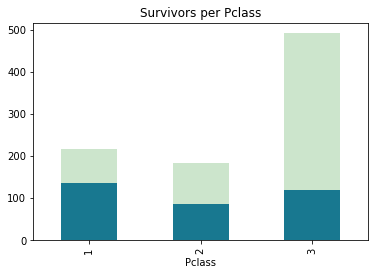

        total  survived  percentage
Sex                                
female    314       233   74.203822
male      577       109   18.890815


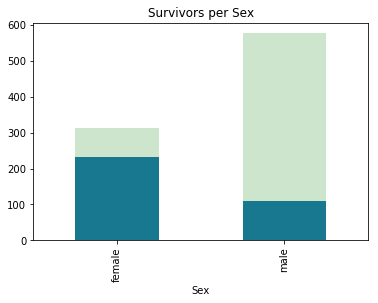

       total  survived  percentage
Age                               
0.42       1         1  100.000000
0.67       1         1  100.000000
0.75       2         2  100.000000
0.83       2         2  100.000000
0.92       1         1  100.000000
1.00       7         5   71.428571
2.00      10         3   30.000000
3.00       6         5   83.333333
4.00      10         7   70.000000
5.00       4         4  100.000000
6.00       3         2   66.666667
7.00       3         1   33.333333
8.00       4         2   50.000000
9.00       8         2   25.000000
10.00      2         0    0.000000
11.00      4         1   25.000000
12.00      1         1  100.000000
13.00      2         2  100.000000
14.00      6         3   50.000000
14.50      1         0    0.000000
15.00      5         4   80.000000
16.00     17         6   35.294118
17.00     13         6   46.153846
18.00     26         9   34.615385
19.00     25         9   36.000000
20.00     15         3   20.000000
20.50      1        

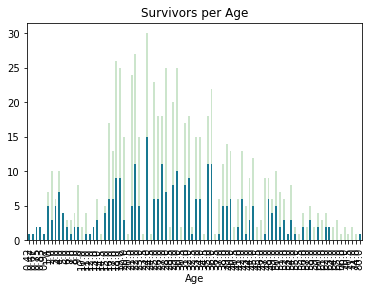

       total  survived  percentage
SibSp                             
0        608       210   34.539474
1        209       112   53.588517
2         28        13   46.428571
3         16         4   25.000000
4         18         3   16.666667
5          5         0    0.000000
8          7         0    0.000000


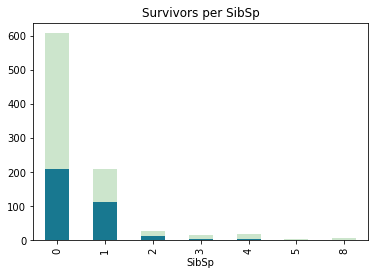

       total  survived  percentage
Parch                             
0        678       233   34.365782
1        118        65   55.084746
2         80        40   50.000000
3          5         3   60.000000
4          4         0    0.000000
5          5         1   20.000000
6          1         0    0.000000


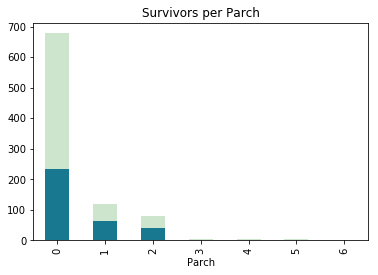

          total  survived  percentage
Fare                                 
0.0000       15         1    6.666667
4.0125        1         0    0.000000
5.0000        1         0    0.000000
6.2375        1         0    0.000000
6.4375        1         0    0.000000
6.4500        1         0    0.000000
6.4958        2         0    0.000000
6.7500        2         0    0.000000
6.8583        1         0    0.000000
6.9500        1         0    0.000000
6.9750        2         1   50.000000
7.0458        1         0    0.000000
7.0500        7         0    0.000000
7.0542        2         0    0.000000
7.1250        4         0    0.000000
7.1417        1         1  100.000000
7.2250       12         3   25.000000
7.2292       15         4   26.666667
7.2500       13         1    7.692308
7.3125        1         0    0.000000
7.4958        3         1   33.333333
7.5208        1         0    0.000000
7.5500        4         1   25.000000
7.6292        1         0    0.000000
7.6500      

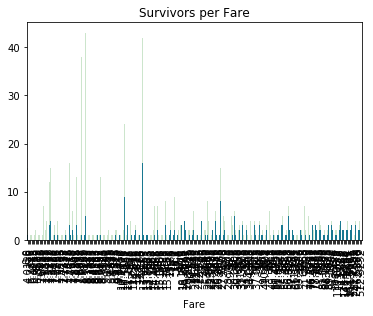

          total  survived  percentage
Embarked                             
C           168        93   55.357143
Q            77        30   38.961039
S           644       217   33.695652


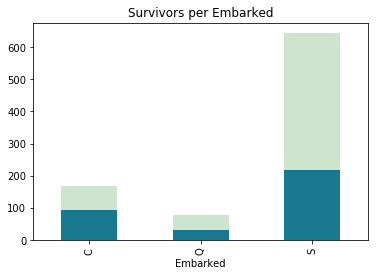

[None, None, None, None, None, None, None]

In [117]:
[get_surv(v) for v in train.axes[1] if v not in ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin',]]

        total  survived  percentage
Pclass                             
1         216       136   62.962963
2         184        87   47.282609
3         491       119   24.236253


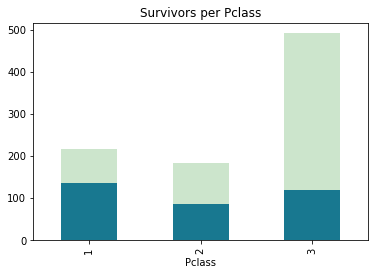

In [88]:
survival_rate('Pclass')

In [ ]:
survival_rate('Sex')

In [ ]:
survival_rate('Age')

        total  survived  percentage
Pclass                             
1         216       136   62.962963
2         184        87   47.282609
3         491       119   24.236253


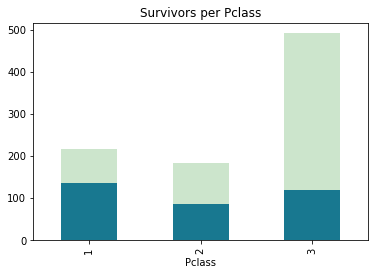

In [109]:
survival_rate('Pclass')

In [ ]:
survival_rate('Fare')